## Marketing and Product Performance

Name: Arathy Boban 

Organization: Entri Elevate 

Date:[Evaluation Date]

## Overview of Problem Statement

Companies often provide multiple subscription tiers(e.g, basic, premium and Standard) for their products or services. Each tier represents different pricing, features, or levels of service.Understanding which factor influence a customer's choice of subscription tier can help businesses improve their marketing strategies, optimize product offerings, and enhance customer satisfaction.

## Objective

To build a classification model to predict a customer's subscription tier based on the provided features.

## Data Description

Source: The source of the data is from Kaggle

## Features: 

1. Campaign_ID: A unique identifier for marketing campaigns.
2. Budget: Total budget allocated for a campaign.
3. Clicks: Total clicks generated by the campaign
4. Conversion: Total conversios(e.g, sales or subscriptions) resulting from the campaign.
5. Revenue_Generated: Revenue directly attributed to the campaign.
6. ROI (Return on Investment): Profitability measure derived from the campaign's revenue and budget.
7. Customer_ID: Unique identifier for customers
8. Subscription_Tier: Indicating the customer's tier(e.g., basic, premium and standard).
9. Subscription_Length: Duration of the customer's subscription(e.g.,months, years).
10. Customer_Satisfaction_Post_Refund: A measure of satisfaction after refunds.
11. Product_ID: Unique identifier for products.
12. Flash_Sale_ID: Identifier for flash sales.
13. Discount_Levels: Percentage of discount offers.
14. Units_Sold: Total units sold.
15. Bundle_ID: Identifier for product bundles.
16. Bundle_Price: Price of bundled products
17. Common_Keywords: Text data that might reveal which marketing masseges perform better.



## Data Collection

In [27]:
# Loading data

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

In [29]:
df = pd.read_csv('marketing_and_product_performance.csv')

In [30]:
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  object 
 1   Product_ID                         10000 non-null  object 
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  object 
 8   Subscription_Tier                  10000 non-null  object 
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  object 
 11  Discount_Level                     10000 non-null  int6

In [32]:
df.describe()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


In [33]:
df.columns

Index(['Campaign_ID', 'Product_ID', 'Budget', 'Clicks', 'Conversions',
       'Revenue_Generated', 'ROI', 'Customer_ID', 'Subscription_Tier',
       'Subscription_Length', 'Flash_Sale_ID', 'Discount_Level', 'Units_Sold',
       'Bundle_ID', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund',
       'Common_Keywords'],
      dtype='object')

## Data preprocessing- Data cleaning

In [34]:
df.isnull().sum()

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.drop(columns=['Campaign_ID','Product_ID','Customer_ID','Flash_Sale_ID'], inplace=True)

## Exploratory Data Analysis (EDA)

In [41]:
# Normalise numerical features

In [42]:
numerical_columns = ['Budget', 'Clicks', 'Revenue_Generated', 'ROI', 
                   'Subscription_Length', 'Discount_Level', 'Units_Sold']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [95]:
df.head()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Tier,Subscription_Length,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords_Durable,Common_Keywords_Innovative,Common_Keywords_Stylish
0,1.150353,1.716062,73,-1.209298,-0.629505,1,-1.381050,0.207936,-1.168534,BNDL_29U6W5,433.80,4,False,False,False
1,0.323173,-1.331500,510,-0.671674,-1.539412,1,-1.381050,-0.663546,-0.064649,BNDL_ULV60J,289.29,2,False,True,False
2,-0.201832,0.741065,265,-0.611436,-1.038192,0,-0.888399,0.672726,1.039236,BNDL_0HY0EF,462.87,4,False,False,False
3,0.327118,0.063442,781,1.601074,0.434623,1,1.377799,-0.198756,1.021714,BNDL_AI09BC,334.16,1,True,False,False
4,0.767531,-1.158786,79,1.119377,0.596556,2,1.082208,-1.128336,-0.853138,BNDL_R03ITT,371.67,2,False,False,False


In [43]:
# Target Variable Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_11740\3109940656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription_Tier', data=df, palette='viridis')


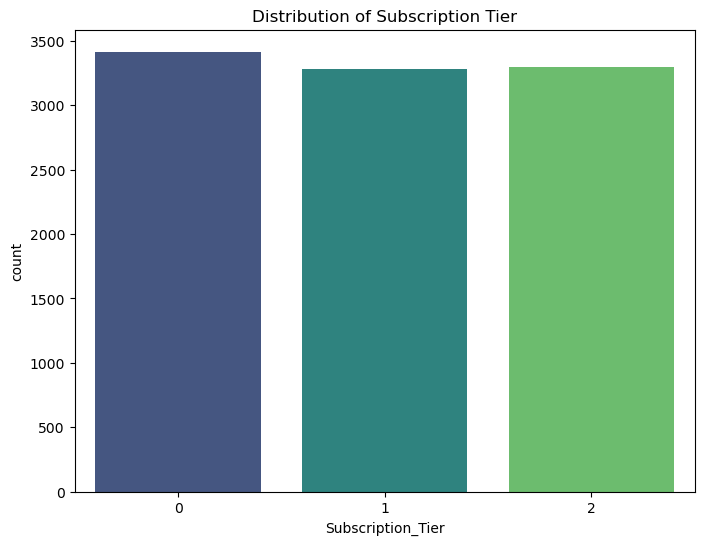

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='Subscription_Tier', data=df, palette='viridis')
plt.title('Distribution of Subscription Tier')
plt.show()

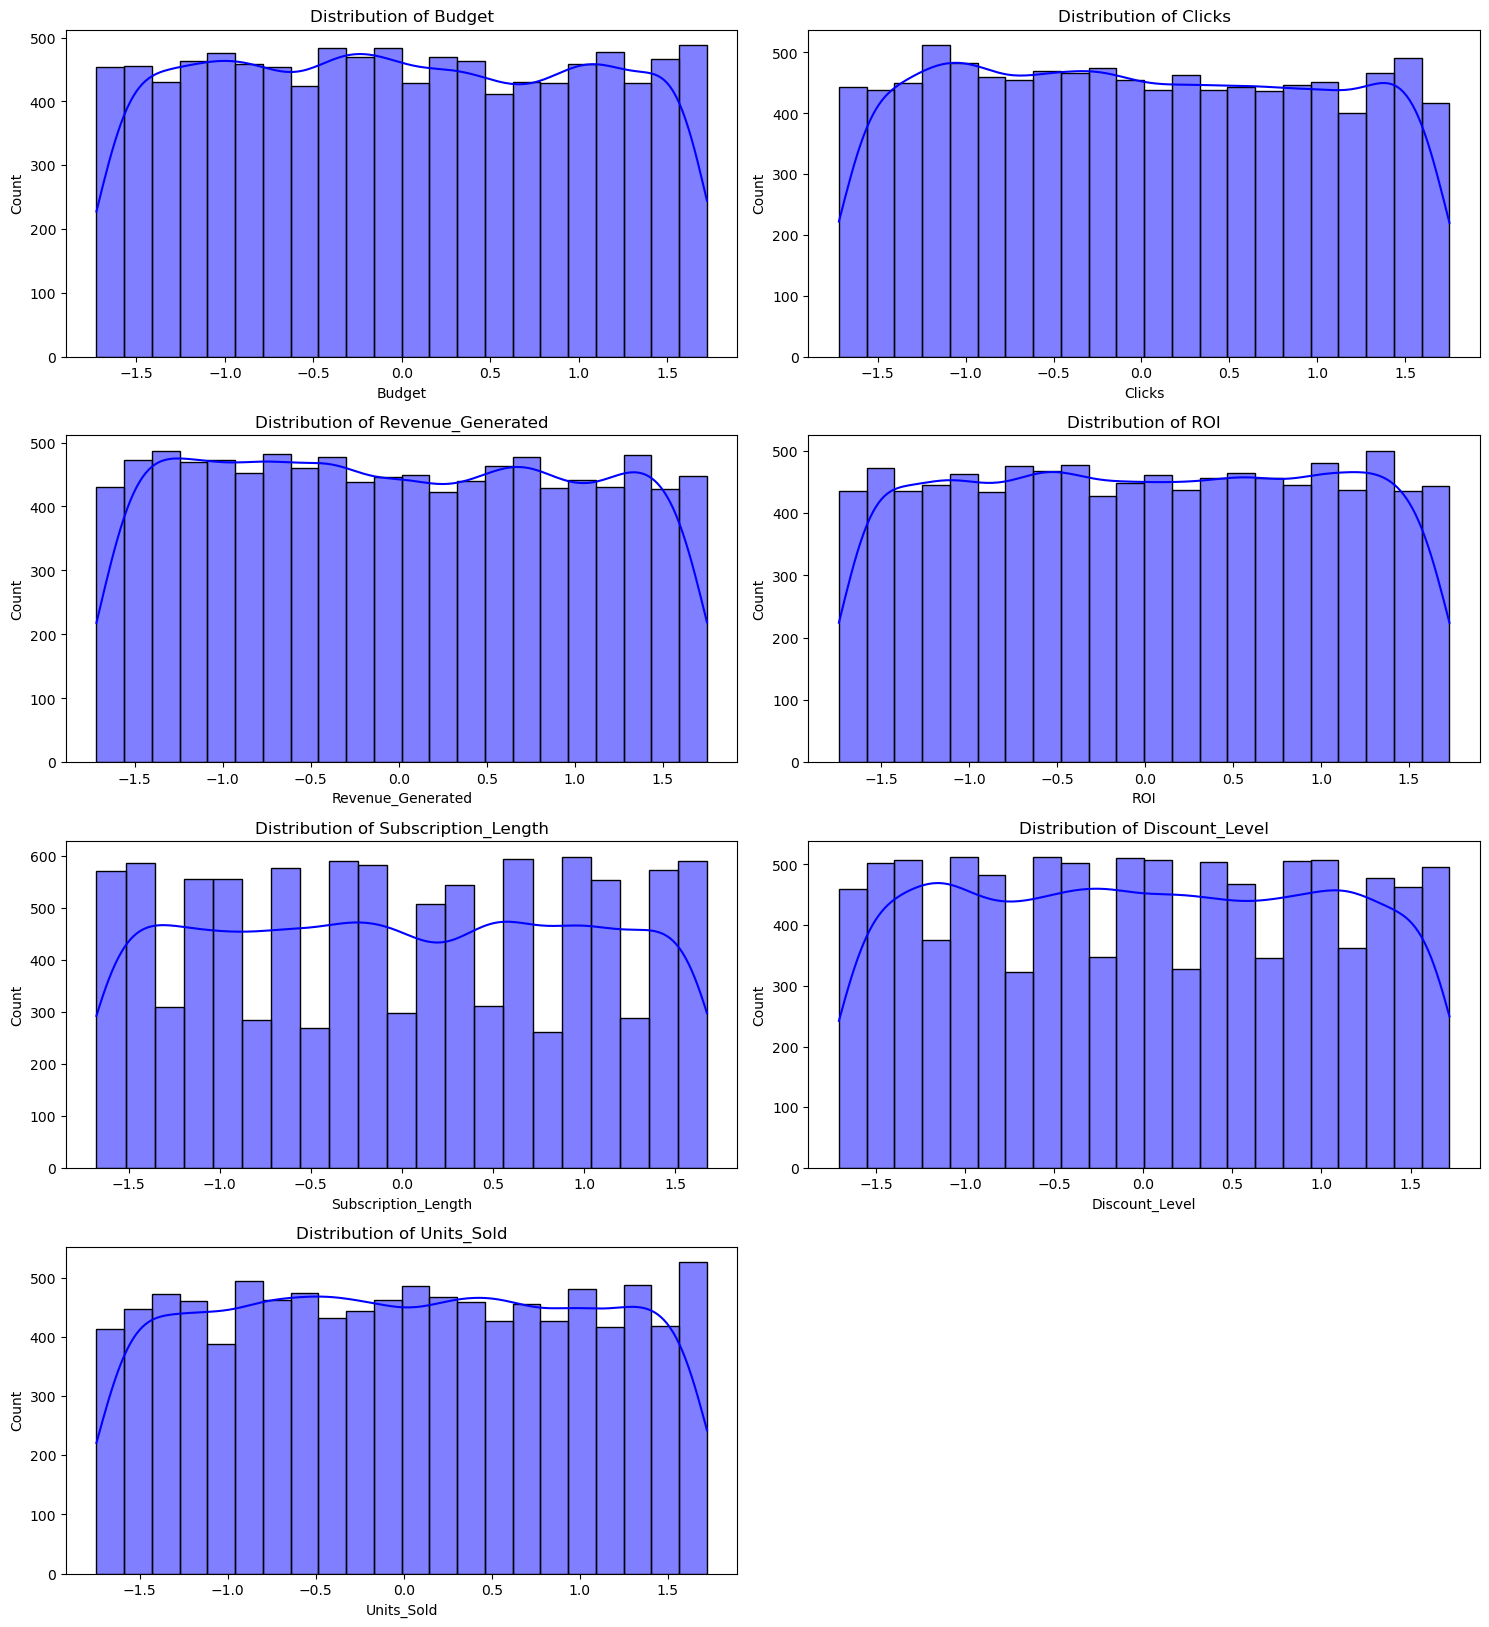

In [45]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [121]:
def handle_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower=Q1-(1.5*IQR)
        upper=Q3+(1.5*IQR)
        
        # Cap the outliers using capping (Winsorizing)
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
        
    return df


df1=handle_outliers_iqr(df)  

In [97]:
df1.head()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Tier,Subscription_Length,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords_Durable,Common_Keywords_Innovative,Common_Keywords_Stylish
0,1.150353,1.716062,73,-1.209298,-0.629505,1,-1.381050,0.207936,-1.168534,BNDL_29U6W5,433.80,4,False,False,False
1,0.323173,-1.331500,510,-0.671674,-1.539412,1,-1.381050,-0.663546,-0.064649,BNDL_ULV60J,289.29,2,False,True,False
2,-0.201832,0.741065,265,-0.611436,-1.038192,0,-0.888399,0.672726,1.039236,BNDL_0HY0EF,462.87,4,False,False,False
3,0.327118,0.063442,781,1.601074,0.434623,1,1.377799,-0.198756,1.021714,BNDL_AI09BC,334.16,1,True,False,False
4,0.767531,-1.158786,79,1.119377,0.596556,2,1.082208,-1.128336,-0.853138,BNDL_R03ITT,371.67,2,False,False,False


In [46]:
# Correlation Analysis

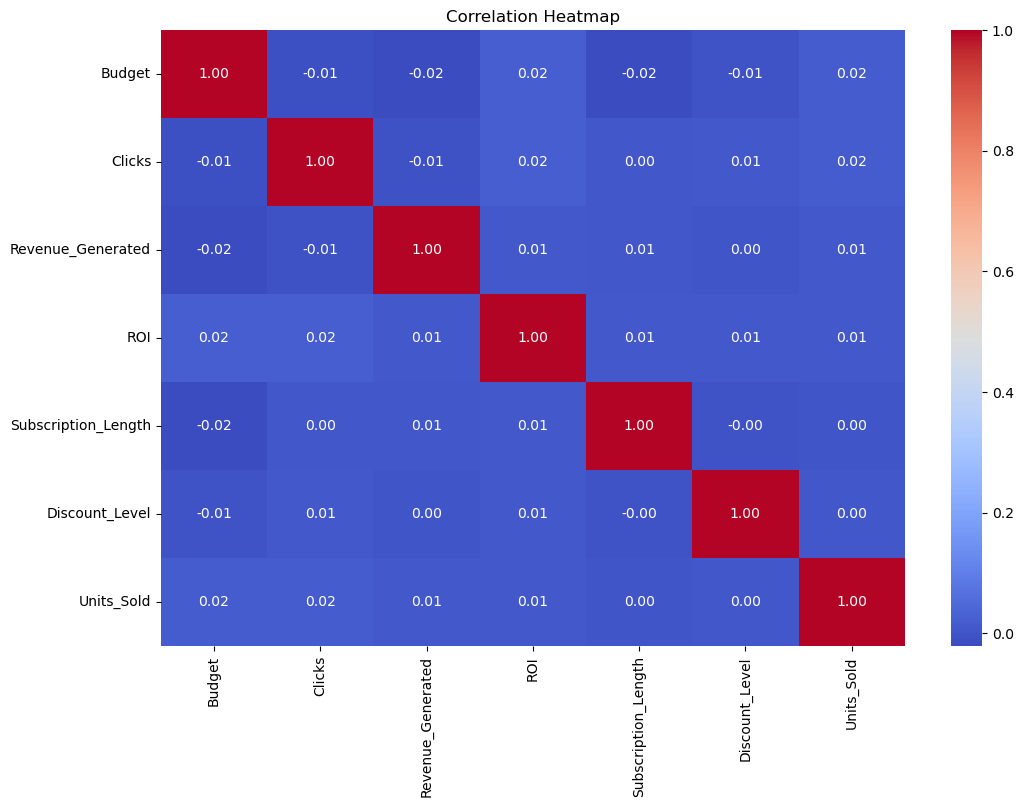

In [99]:
plt.figure(figsize=(12, 8))
correlation_matrix = df1[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [48]:
# Outlier Detection- Boxplots

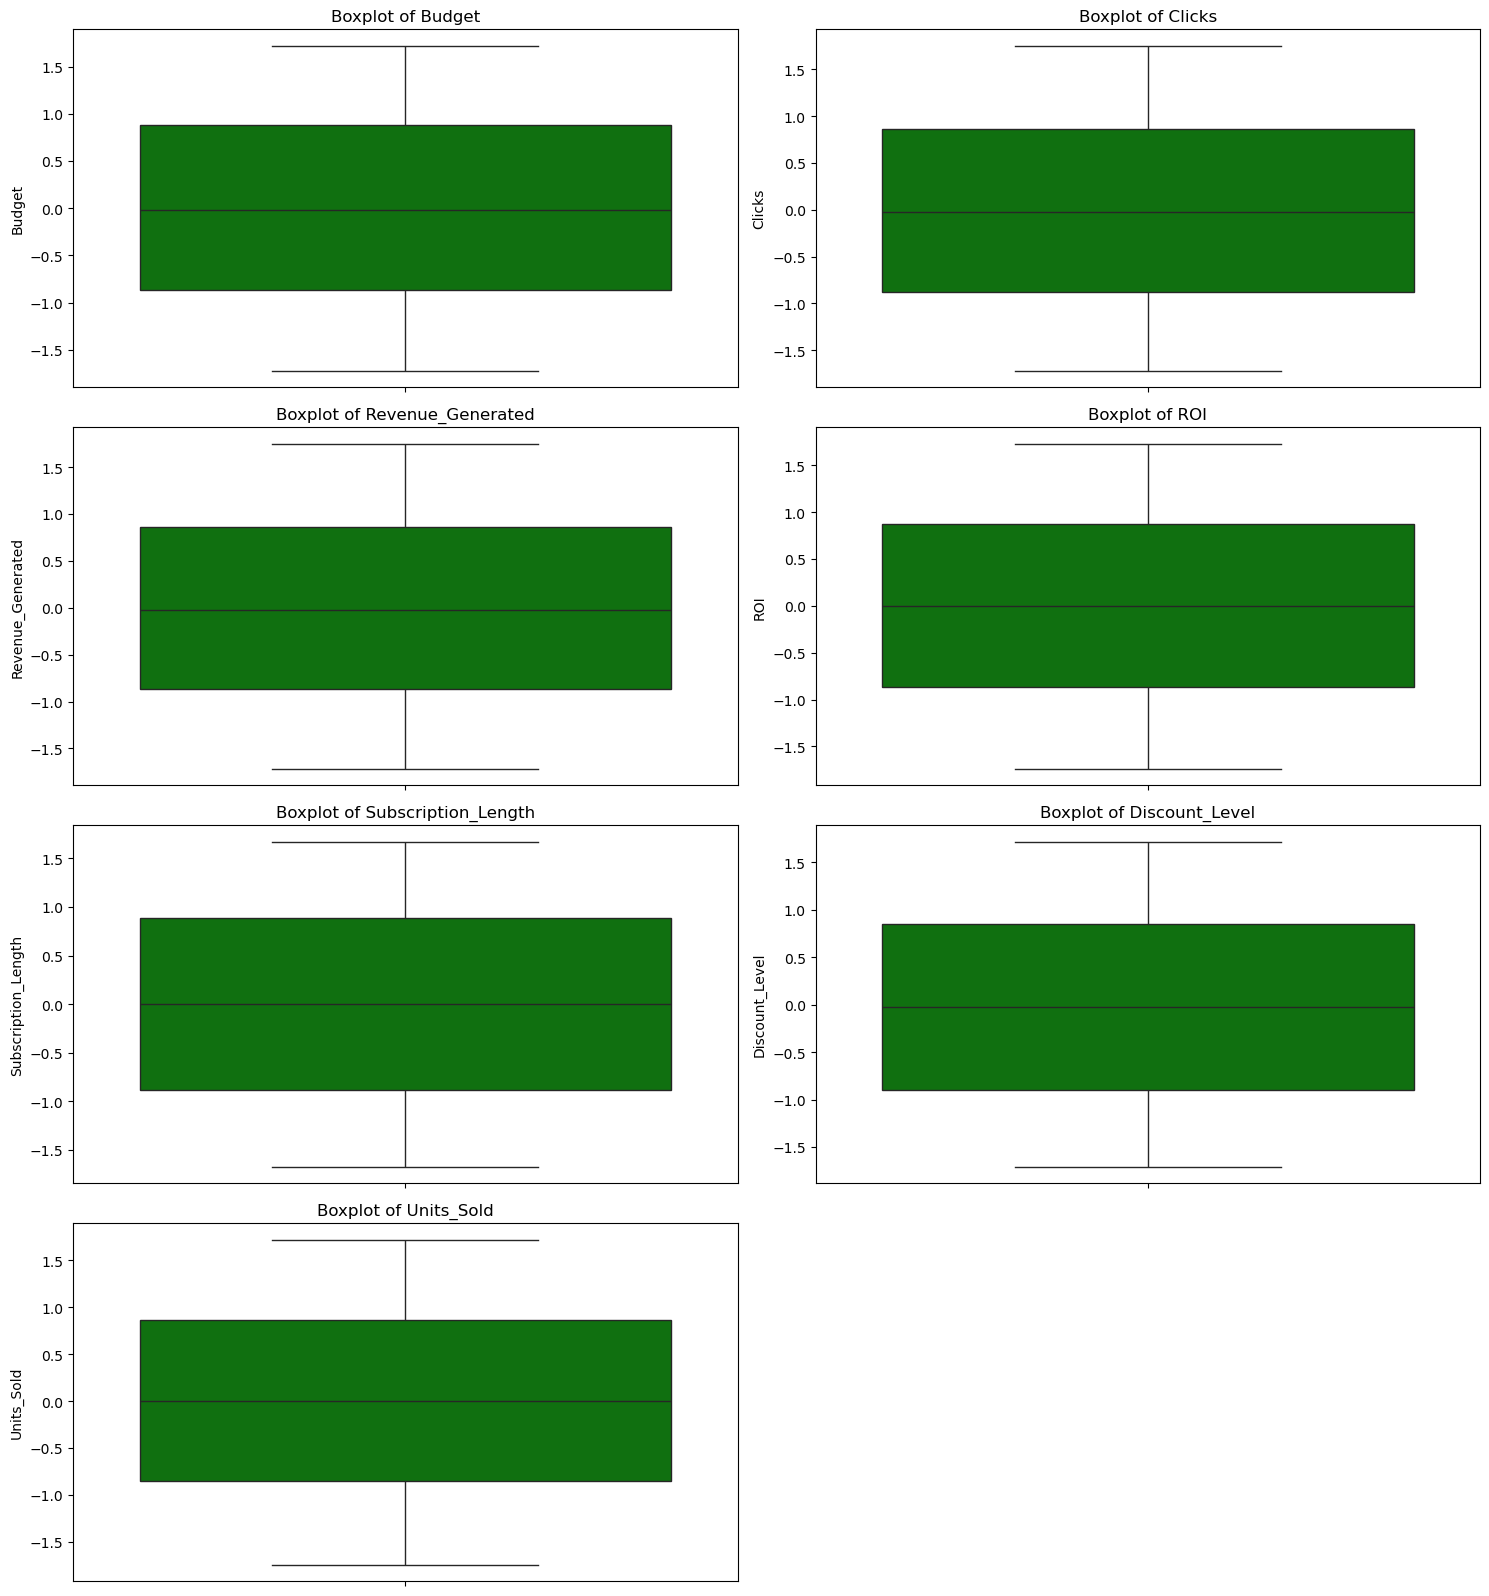

In [101]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i,col in enumerate(numerical_columns):
    sns.boxplot(y=df1[col], ax=axes[i], color='green')
    axes[i].set_title(f'Boxplot of {col}')

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [50]:
#Revenue generated vs budget

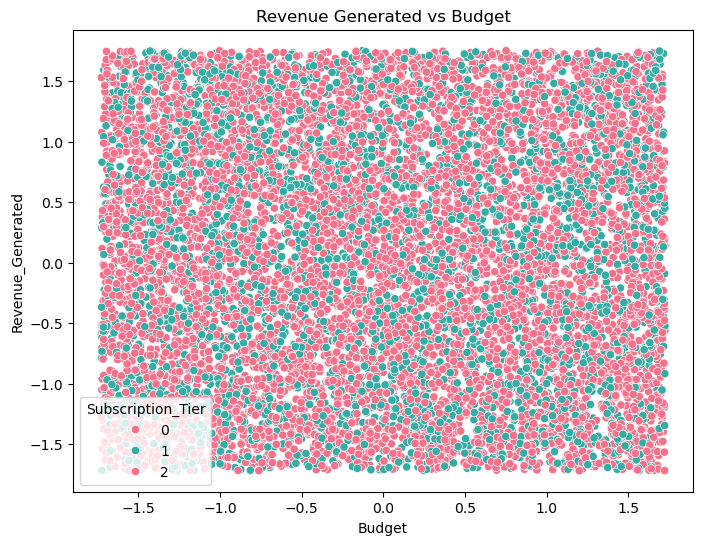

In [103]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Budget', y='Revenue_Generated', hue='Subscription_Tier', data=df1, palette='husl')
plt.title("Revenue Generated vs Budget")
plt.show()

In [52]:
# Units sold vs Discount level

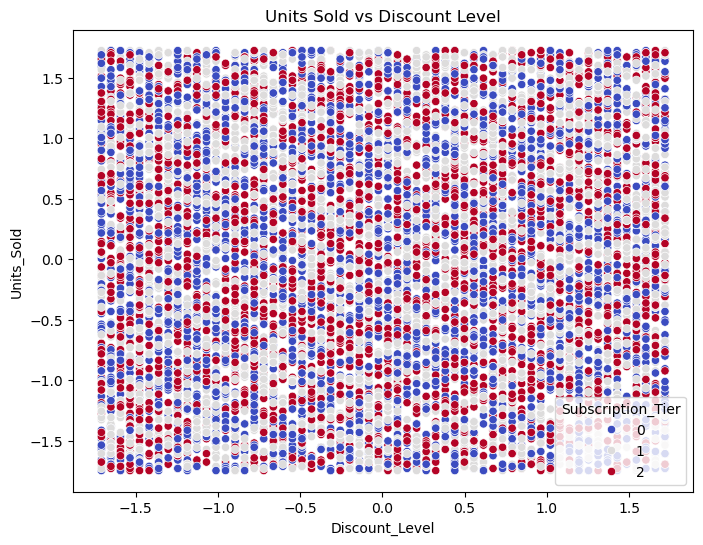

In [105]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount_Level', y='Units_Sold', hue='Subscription_Tier', data=df1, palette='coolwarm')
plt.title("Units Sold vs Discount Level")
plt.show()
           

## Feature Engineering

In [131]:
# Encode Target Varible

In [133]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [135]:
label_encoder = LabelEncoder()
df['Subscription_Tier'] = label_encoder.fit_transform(df['Subscription_Tier'])

In [137]:
label_encoder = LabelEncoder()
df['Subscription_Tier'] = label_encoder.fit_transform(df['Subscription_Tier'])

## feature selection

In [109]:
X = df1.drop(columns=['Subscription_Tier'])
y = df1['Subscription_Tier']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [146]:
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] =LabelEncoder().fit_transform(X[col])
    
X = pd.get_dummies(X, drop_first=True)

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores = scores.sort_values(by='Score', ascending=False)


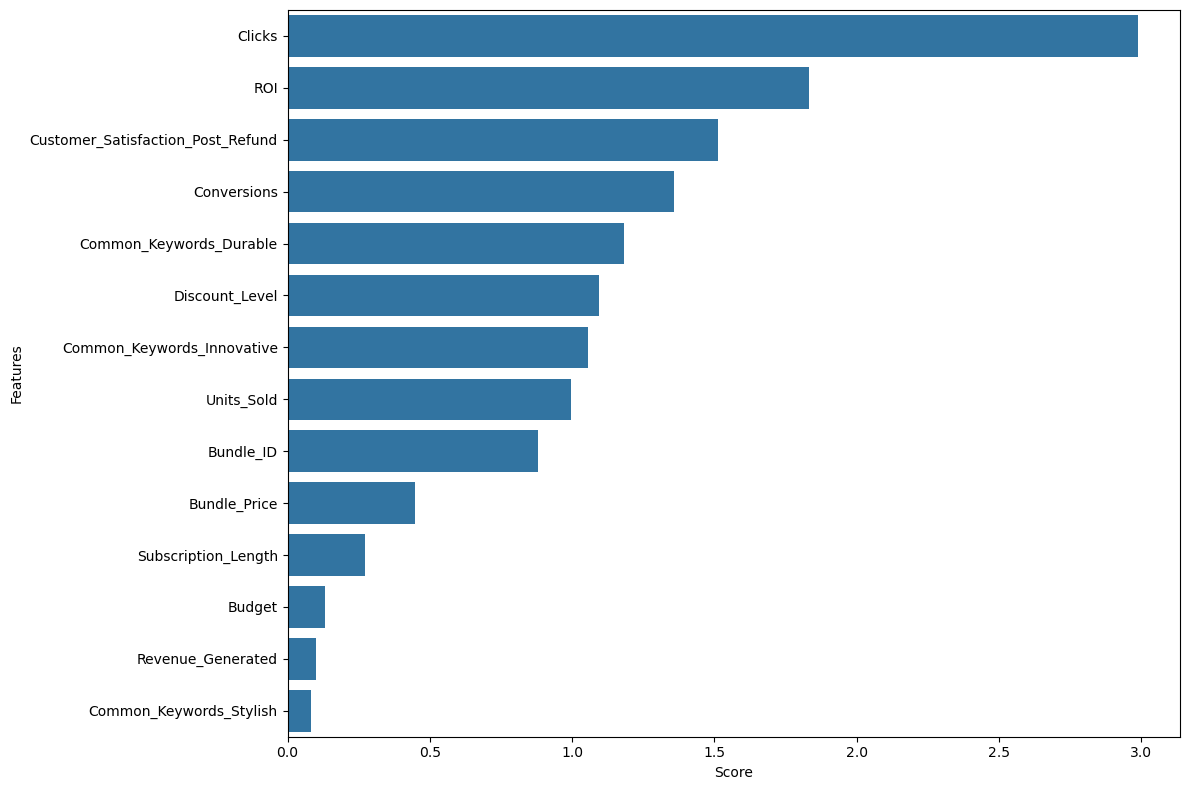

In [150]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=scores)
plt.xlabel("Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()